# Practica 1 - Random Walks

**Nombre:** Roberto Octavio Carrillo Luevano  
**e-mail:** roberto.carrillo7958@alumnos.udg.mx

## Caminatas Aleatorias

Dentro de diversos campos, tales como la computación, química, biología, economía, entre otros, el estudio de las caminatas aleatorias ha sido de gran utilidad en el desarrollo científico. Se definen como el proceso que permite determinar la posición probable de un punto sujeto a movimientos aleatorios, dadas las probabilidades (la misma en cada paso) de avanzar cierta dirección, y en cierta distancia.

Existen casos específicos que estaremos analizando en el desarrollo de las próximas prácticas, tales como el **movimiento browniano** y el **vuelo de Levy**.

### Definición

Si establecemos que $ X_{(t)} $ representa una trayectoria que empieza en la posición $ X(0) = X_{0} $, entonces un paseo aleatorio se puede definir como:

$$ X(t+\tau) = X(t) + \Phi(\tau) $$

## Movimiento Browniano

Es un fenómeno donde una partícula está experimentando de forma constante fluctuaciones pequeñas y aleatorias. Éste tipo de movimiento es estudiado para predecir su comportamiento promedio mediante modelos de probabilidad.

## MODULES

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

import plotly.graph_objects as go

from scipy.stats import norm
from scipy.stats import wrapcauchy

## CLASSES

In [3]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:            
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y
            
    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)
    
    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)
    
    # rotate vector
    def rotated(self, angle):        
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## Ejemplo Brownian Motion 1D

In [4]:
# Init parameters
s_pos = 0
n_steps = 1000

# Warning about the small number of steps
if n_steps < 30:
    print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")

# Init Brownian Walk vector
bw = np.ones(n_steps)*s_pos

# Generate trajectory
for i in range(1, n_steps):
    # Sampling from a uniform distribution
    di = np.random.choice([1,-1])
    # Wiener process
    bw[i] = bw[i-1]+(di/np.sqrt(n_steps))

## Actividad 1: Brownian Motion 1D - N Trayectorias (3 pts)

* Implementacion con variable de control que permita generar y graficar cualquier numero de trayectorias
* Visualizar con *matplotlib*

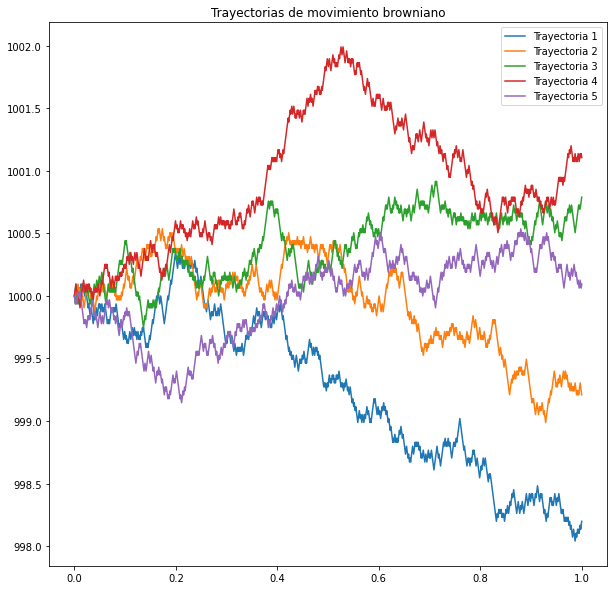

In [12]:
# Definición de parámetros iniciales

start_pos = 0
n_steps = 1000
n_trajectories = 5
times = np.linspace(0,1,n_steps)

# Definir la función para generación de 'n' trayectorias movimiento browniano
def generate_BW_trajectory(start_pos, n_steps, n_trajectories):
  
  # Inicialización de Vector de MB
  bw = np.ones(n_steps) * n_steps

  for tr in range(0, n_trajectories):
    for i in range(1, n_steps):
      # Muestreo de decisión aleatoria
      di = np.random.choice([1,-1])
      # Proceso de Wiener
      bw[i] = bw[i-1]+(di/np.sqrt(n_steps))
    
    # Agregar gráfica de resultado a figura 
    plt.plot(times, bw, label=f"Trayectoria {tr + 1}")

# Ejecutar función para generar trayectorias
generate_BW_trajectory(start_pos, n_steps, n_trajectories)
mpl.rcParams["figure.figsize"] = (10,10)

# Mostrar gráfica
plt.title("Trayectorias de movimiento browniano")
plt.legend()
plt.show()

## Actividad 2: Brownian Motion 2D - 1 Trayectoria (5 pts)

* **No** utilizar la clase Vec2d
* Movimientos: Norte, Sur, Este, Oeste (arriba, abajo, izquierda, derecha)
* Visualizar con **matplotlib** - Proyeccion en 2D
* Visualizar con **matplotlib** - Proyeccion en 3D


In [95]:
# Definir función para movimiento browniano de 4 direcciones
def brownian(start_pos, n_steps):

    # Creamos un arreglo de 2 vectores de n_steps de longitud, y asignamos
    # la posición inicial en la primera pocisión de cada vector
    out = np.zeros((2, n_steps))
    out[0] = start_pos[0] 
    out[1] = start_pos[1] 

    for curr_step in range(1, n_steps):
      
      # Definimos una dirección que tiene uniforme probabilidad de moverse
      # en alguna de las 4 direcciones, y definimos la posición anterior como referencia
      direction = np.random.choice(["UP", "DOWN", "LEFT", "RIGHT"])
      prev_x = out[0][curr_step - 1]
      prev_y = out[1][curr_step - 1]

      # Asignamos el valor de la nueva trayectoria añadiendo el valor de la posición previa
      if(direction == "UP"):
        out[0][curr_step] = prev_x
        out[1][curr_step] = prev_y + 1
      elif(direction == "DOWN"):
        out[0][curr_step] = prev_x
        out[1][curr_step] = prev_y - 1
      elif(direction == "LEFT"):
        out[0][curr_step] = prev_x - 1
        out[1][curr_step] = prev_y
      else:
        out[0][curr_step] = prev_x + 1
        out[1][curr_step] = prev_y

    return out


# Definición de parámetros iniciales

start_pos = [0, 0]
n_steps = 10000

# Generación de la trayectoria

BW = brownian(start_pos, n_steps)

### Gráfica 2D

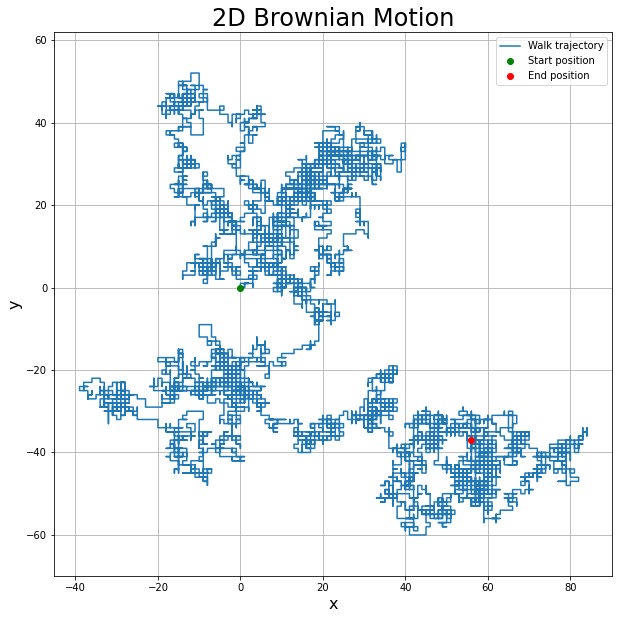

In [96]:
# Graficar trayectoria
plt.plot(BW[0], BW[1], label="Walk trajectory")

# Graficar inicio y fin de trayectora
plt.plot(BW[0,0],  BW[1,0],  'go', label="Start position")
plt.plot(BW[0,-1], BW[1,-1], 'ro', label="End position")

# Formato de gráfica
plt.title('2D Brownian Motion', fontsize=24)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

### Gráfica 3D

In [97]:
# 3D Brownian motion plot

# Generate aux z plot
times = np.linspace(0,1, n_steps)

# Crear Figura
plot3d = go.Figure(data=go.Scatter3d(
    x=BW[0], y=BW[1], z=times,
    marker=dict(
        size=3,
        color=times,
        colorscale='haline',
    ),
    line=dict(
        color='blue',
        width=2
    )
))

# Posicionar Escena y propiedades
plot3d.update_layout(
    width=800,
    height=700,
    autosize=False,
    title='3D Brownian Motion',
    scene=dict(
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=0,
                y=1.0707,
                z=1,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual',
        xaxis_title = 'X',
        yaxis_title = 'Y',
        zaxis_title = 'Z',
    ),
)

plot3d.show()

## Actividad 3: Correlated Random Walk - 1 Trayectoria (7 pts)

* Utilizar la clase Vec2d
* Seleccionar los giros del vector de velocidad de una distribucion de Cauchy
* **Tip:** Revisar documentacion de scipy.stats.wrapcauchy
* Visualizar con **plotly**

<function matplotlib.pyplot.show(*args, **kw)>

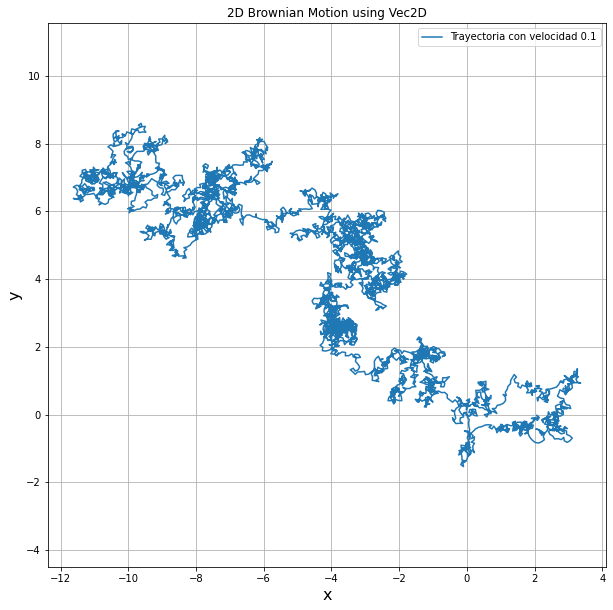

In [101]:
# Parámetros Iniciales
n_steps = 5000
s_pos = 0
coeficients = [0.1]

# Definiendo función para crear trayectoria
def CRW_trajectory(coeficient):
  # Inicializando vector de velocidad
  velocity = Vec2d(coeficient,0)
  # Creando matriz para el caminado aleatorio
  #BM_2d = wrapcauchy.rvs(coeficient, size=n_steps)
  BM_2d = np.ones(shape=(n_steps,2))* s_pos

  for i in range(1,n_steps):

    #Use wrapCauchy to generate random number
    turn_angle = wrapcauchy.rvs(coeficient, size=1)
    # Girar el vector de velocidad
    velocity = velocity.rotated(turn_angle)

    # Desplazamiento con el vector
    BM_2d[i,0] = BM_2d[i-1,0] + velocity.x
    BM_2d[i,1] = BM_2d[i-1,1] + velocity.y
  return BM_2d

def plot_CRW_trajectory(coeficient):
  BM_2d_coeficient = CRW_trajectory(coeficient)
  plt.plot(
    BM_2d_coeficient[:,0], BM_2d_coeficient[:,1], label=f'Trayectoria con velocidad {coeficient}'
  )

for sp in coeficients:
  plot_CRW_trajectory(sp)

plt.title('2D Brownian Motion using Vec2D')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show

In [ ]:
# Parámetros Iniciales

# Resolución
resolution = 200
# Definiendo vector auxiliar
aux_domain = np.linspace(0, 2*np.pi, resolution)
# Definiendo un conjunto de exponentes para generar diferentes distribuciones
CRW_exps = [0.00001, 0.3, 0.4, 0.6, 0.9]
# CRW Figure
fig_wrapcauchy_pdf = go.Figure()
# Create aux plot
aux_plot = np.linspace(-np.pi,np.pi, resolution)

# Definiendo función para generar wrapcauchy
def wrapcauchy_pdf_exp(CWR_exp):
  return np.array([wrapcauchy.pdf(i, CWR_exp) for i in aux_domain])

def plot_wrapcauchy_pdf(wrapcauchy_pdf, plotname):
  # Define concatenated plot
  plot_wc_pdf = np.concatenate((wrapcauchy_pdf[int(resolution/2):resolution], wrapcauchy_pdf[0:int(resolution/2)]), axis=0)
  # Add the trace to the figure
  fig_wrapcauchy_pdf.add_trace(go.Scatter( 
    x = aux_plot,
    y = plot_wc_pdf,
    marker = dict(size=2),
    line = dict(width=2),
    mode = 'lines',
    name = plotname,
  ))

In [ ]:
for exp in CRW_exps:
  wrapcauchy_pdf = wrapcauchy_pdf_exp(exp)
  plot_wrapcauchy_pdf(wrapcauchy_pdf, f'cauchy_{exp}')

fig_wrapcauchy_pdf.update_layout(title_text='Wrap Cauchy Density Functions at different exponents')
fig_wrapcauchy_pdf.show()

## Conclusiones

Los caminados aleatorios son uno de los conceptos más simples, pero al mismo tiempo de los más complejos dentro del desarrollo científico. Entender sus características, así como la relevancia de sus implementaciones nos permite ver cómo se ven afectados los caminados si empezamos a variar sus parámetros, además de entender cómo podemos usar las diferentes librerías de software que facilitan el desarrollo de simulaciones, así como de su visualización.

En ésta práctica, logré entender cómo los caminados aleatorios, tales como el movimiento browniano va generando una trayectoria, aunque aleatoria, identificable, la cual podemos analizar en casos reales y obtener un mejor entendimiento de sus aplicaciones en cualquier rama.

## Referencias
 * [Random Walks](https://www.britannica.com/science/random-walk)

 * [Movimiento Browniano](https://www.britannica.com/science/Brownian-motion)

 * [WrapCauchy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wrapcauchy.html#scipy.stats.wrapcauchy)